In [ ]:
import pandas as pd

df = pd.read_csv('/content/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
#jumlah film dan TV show
df['type'].value_counts()

,count
type,
Movie,6131
TV Show,2676


In [ ]:
#Genre (kategori) paling populer
df['listed_in'].value_counts().head(10)

,count
listed_in,
"Dramas, International Movies",362
Documentaries,359
Stand-Up Comedy,334
"Comedies, Dramas, International Movies",274
"Dramas, Independent Movies, International Movies",252
Kids' TV,220
Children & Family Movies,215
"Children & Family Movies, Comedies",201
"Documentaries, International Movies",186


In [ ]:
#negara dengan konten terbanyak
df['country'].value_counts().head(10)

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
Canada,181
Spain,145
France,124
Mexico,110


In [ ]:
df['country'].fillna('Unknown', inplace=True)

/tmp/ipython-input-2372192134.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#konfigurasi visual
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

**KONTRIBUSI KONTEN FILM VS SHOW**

/tmp/ipython-input-2893156685.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


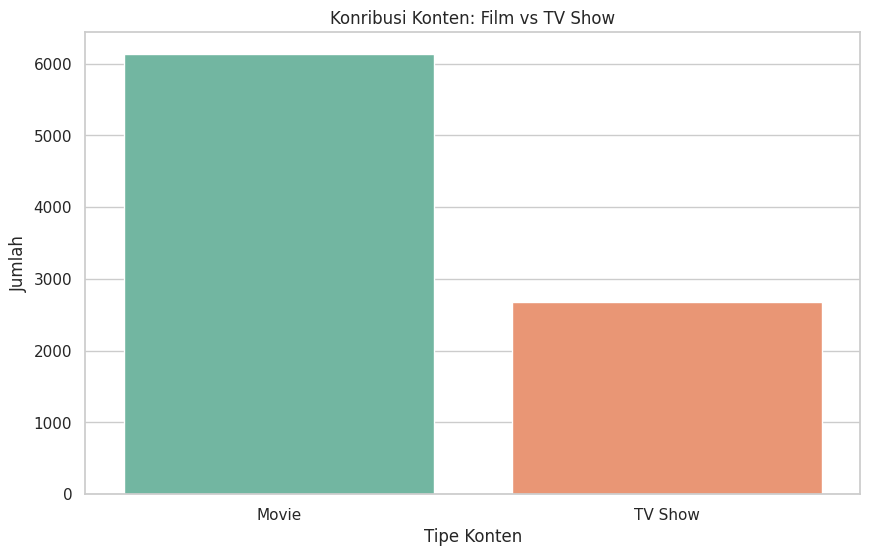

In [ ]:
#visual konribusi konten: Film vs TV show
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Konribusi Konten: Film vs TV Show')
plt.xlabel('Tipe Konten')
plt.ylabel('Jumlah')
plt.show()

**GENDRE PALING POPULER**

/tmp/ipython-input-805623716.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_gendres.index, y=top_gendres.values, palette='coolwarm')


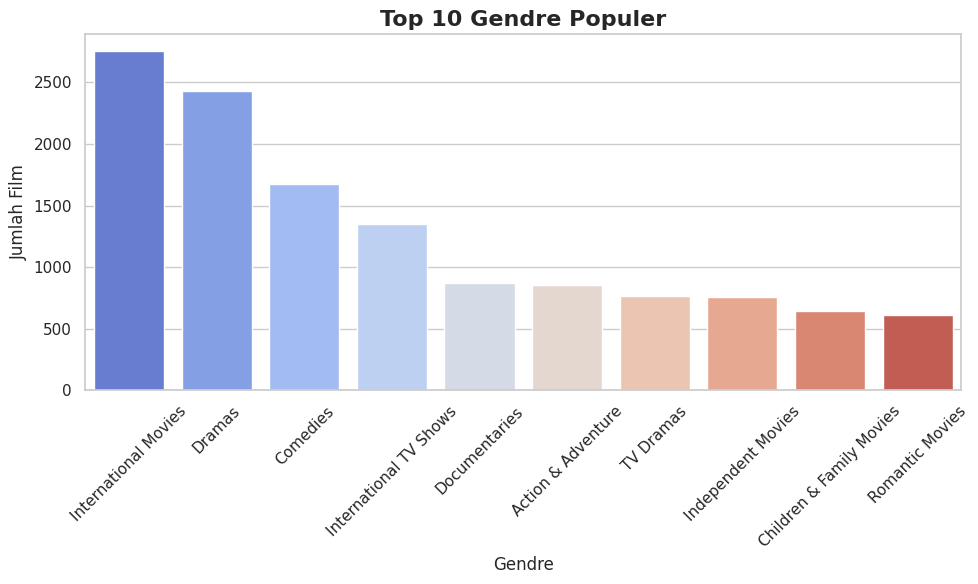

In [ ]:
#gendre paling populer(Top 10)
gendre_series = df['listed_in'].dropna().str.split(', ').explode().str.strip()
top_gendres = gendre_series.value_counts().head(10)

sns.barplot(x=top_gendres.index, y=top_gendres.values, palette='coolwarm')
plt.title('Top 10 Gendre Populer', fontsize=16, fontweight='bold')
plt.xlabel('Gendre')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**NEGARA DENGAN KONTEN TERBANYAK**

/tmp/ipython-input-3508527988.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')


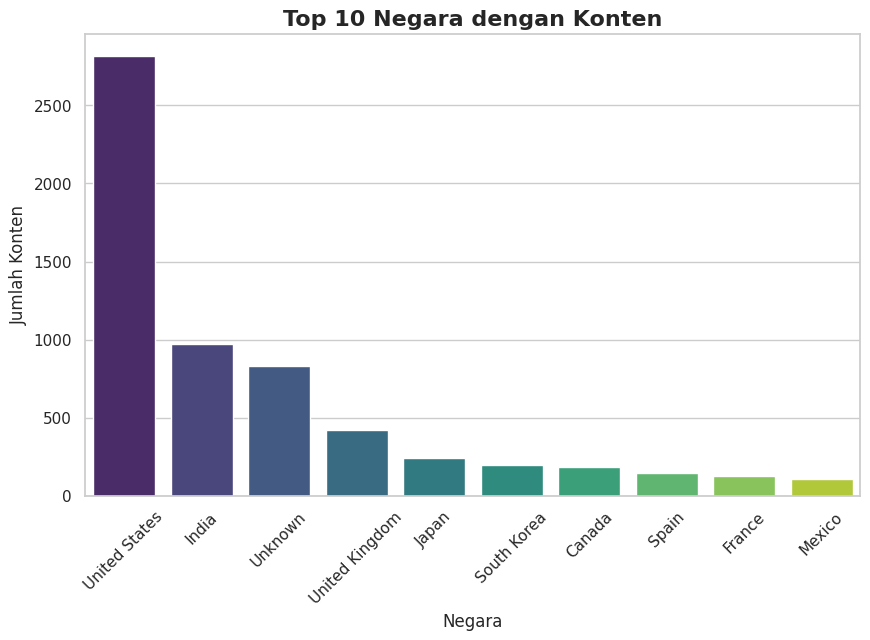

In [ ]:
#negara dengan konten terbanyak (top 10)
top_countries = df['country'].dropna().value_counts().head(10)

sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Negara dengan Konten', fontsize=16, fontweight='bold')
plt.xlabel('Negara')
plt.ylabel('Jumlah Konten')
plt.xticks(rotation=45)
plt.show()

**TREN RILIS KONTEN PER TAHUN**

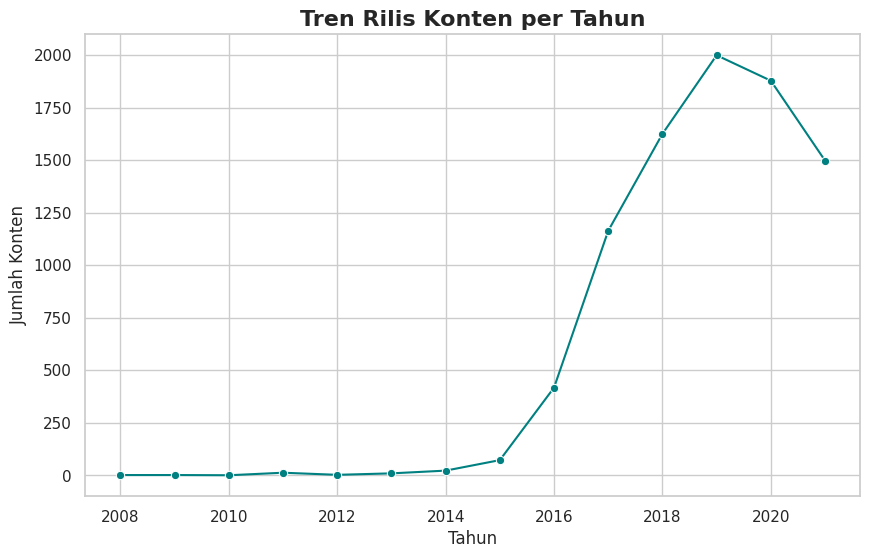

In [ ]:
#Tren rilis konten per tahun
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

yearly_trend = df['year_added'].value_counts().sort_index()

sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker='o', color='teal')
plt.title('Tren Rilis Konten per Tahun', fontsize=16, fontweight='bold')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Konten')
plt.show()

**DISTRIBUSI RATING**

/tmp/ipython-input-784519664.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='magma')


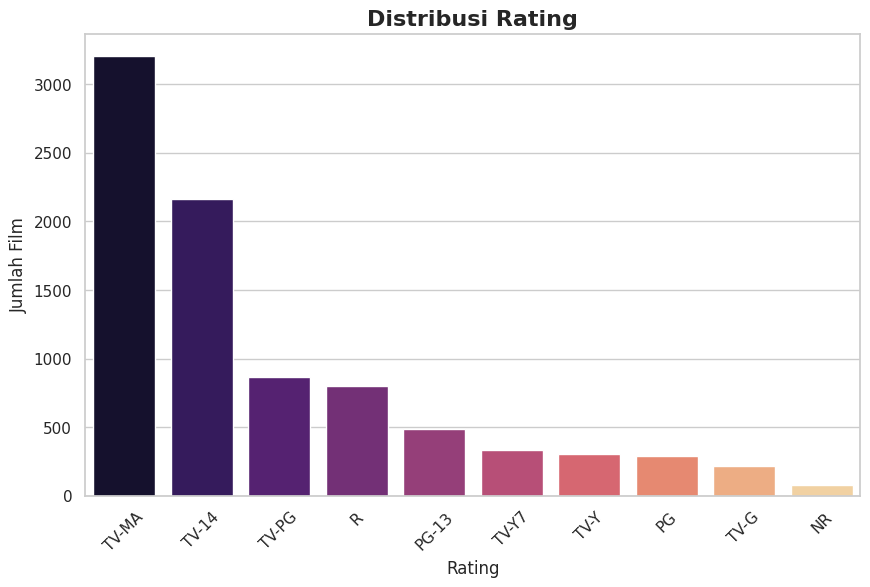

In [ ]:
#distribusi Rating (TV-MA, PG, dll)
top_ratings = df['rating'].dropna().value_counts().head(10)

sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='magma')
plt.title('Distribusi Rating', fontsize=16, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45)
plt.show()

**ANALISIS DURASI KONTEN**

/tmp/ipython-input-694719289.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['durantion_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)


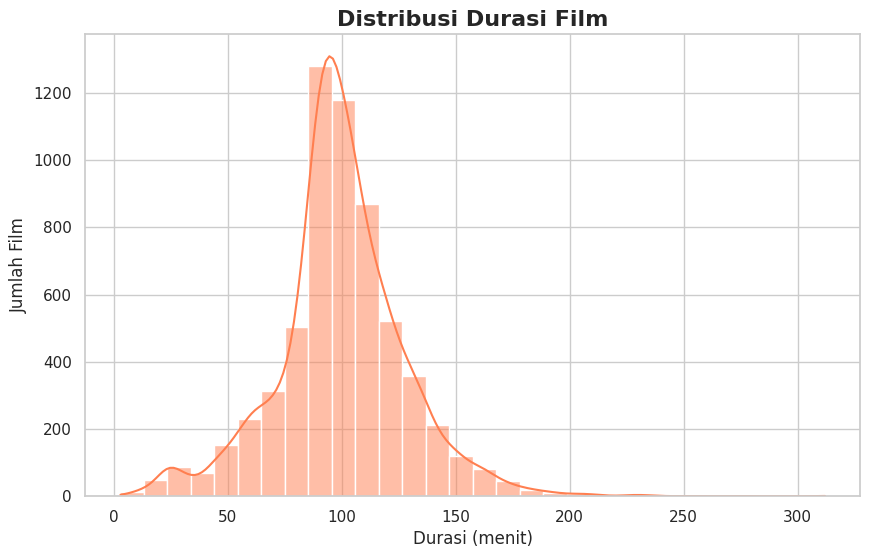

In [23]:
#Pisahkan Movie dan TV Show
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

#Ubah durasi Movie ke Angka (dalam menit)
movies['durantion_minutes'] = movies['duration'].str.extract('(\d+)').astype(float)

#Visualisasi distribusi durasi film
sns.histplot(movies['durantion_minutes'], bins=30, kde=True, color='coral')
plt.title('Distribusi Durasi Film', fontsize=16, fontweight='bold')
plt.xlabel('Durasi (menit)')
plt.ylabel('Jumlah Film')
plt.show()

**ANALISIS AKTOR PALING SERING MUNCUL**

/tmp/ipython-input-4656650.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.index, y=top_actors.values, palette='viridis')


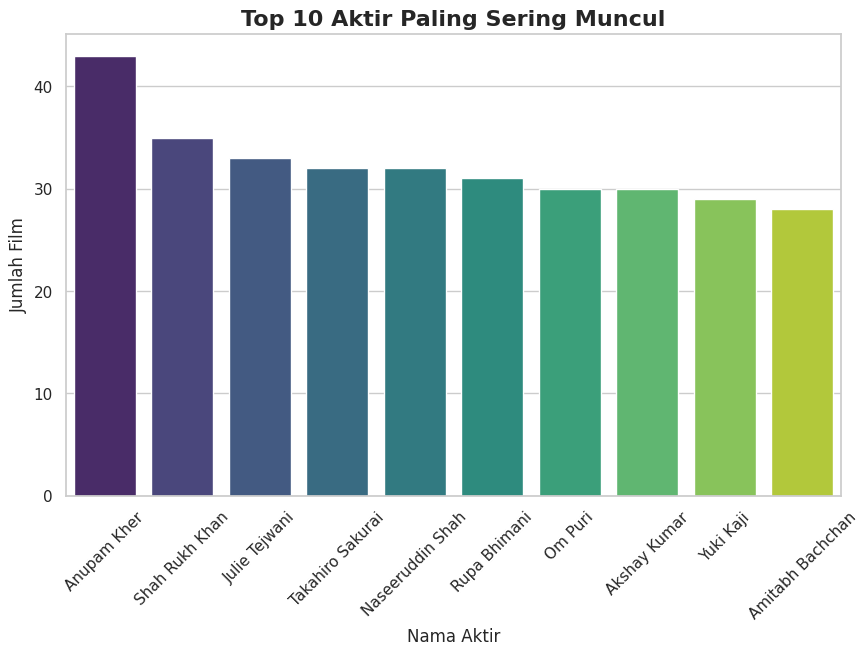

In [26]:
#Ambil kolom cast dan pecah jadi list aktor
cast_series = df['cast'].dropna().str.split(', ').explode().str.strip()

#Hitung aktor paling sering muncul
top_actors = cast_series.value_counts().head(10)

sns.barplot(x=top_actors.index, y=top_actors.values, palette='viridis')
plt.title('Top 10 Aktir Paling Sering Muncul', fontsize=16, fontweight='bold')
plt.xlabel('Nama Aktir')
plt.ylabel('Jumlah Film')
plt.xticks(rotation=45)
plt.show()

**REKOMENDASI KONTEN SEDERHANA BERDASARKAN GENDRE ACTION**

In [27]:
#Contoh: rekomendasi konten berdasrakan gendre 'Action'
gendre_filter = df[df['listed_in'].str.contains('Action', case=False)]

#Tampilkan 10 rekomendasi acak
recommended_movies = gendre_filter[['title', 'type', 'release_year']].sample(10)
print("Rekomendasi konten Gendre Action")
print(recommended_movies)

Rekomendasi konten Gendre Action
                                        title     type  release_year
8142  Sword Masters: Two Champions of Shaolin    Movie          1980
6627               Don't Crack Under Pressure    Movie          2015
6002                     2307: Winter's Dream    Movie          2016
4045                             The Hard Way    Movie          2019
5194                                The Truth  TV Show          2008
579                              Midnight Run    Movie          1988
6343                              Blue Streak    Movie          1999
7403                                Marauders    Movie          2016
6851                        Ghulam-E-Musthafa    Movie          1997
133                                   Chappie    Movie          2015


**REKOMENDASI KONTEN SEDERHANA BERDASARKAN GENDRE DRAMA**

In [28]:
#Contoh: rekomendasi konten berdasrakan gendre 'Drama'
gendre_filter = df[df['listed_in'].str.contains('Drama', case=False)]

#Tampilkan 10 rekomendasi acak
recommended_movies = gendre_filter[['title', 'type', 'release_year']].sample(10)
print("Rekomendasi konten Gendre Drama")
print(recommended_movies)

Rekomendasi konten Gendre Drama
                                          title     type  release_year
7917                                      Sadma    Movie          1983
7706                                     Pardes    Movie          1997
7949                           Saving Mr. Banks    Movie          2013
5441                           The Wishing Tree    Movie          2017
5352  Have You Ever Fallen in Love, Miss Jiang?  TV Show          2016
5656                                       7:19    Movie          2016
6712                           Every Time I Die    Movie          2019
6062                         A Walk to Remember    Movie          2002
1673                               Black Friday    Movie          2004
7632         O-Negative, Love Can’t Be Designed  TV Show          2016


**REKOMENDASI KONTEN SEDERHANA BERDASARKAN GENDRE COMEDY**

In [29]:
#Contoh: rekomendasi konten berdasrakan gendre 'Comedy'
gendre_filter = df[df['listed_in'].str.contains('Comedy', case=False)]

#Tampilkan 10 rekomendasi acak
recommended_movies = gendre_filter[['title', 'type', 'release_year']].sample(10)
print("Rekomendasi konten Gendre Comedy")
print(recommended_movies)

Rekomendasi konten Gendre Comedy
                                            title     type  release_year
5847                         Ali Wong: Baby Cobra    Movie          2016
4412    John Leguizamo's Latin History for Morons    Movie          2018
3591                     Whindersson Nunes: Adult    Movie          2019
5901                                          Tig    Movie          2015
7101                                         마녀사냥  TV Show          2015
5034                  Agustín Aristarán: Soy Rada    Movie          2018
7120                    Japanese Style Originator  TV Show          2008
3620                         Jim Jefferies : BARE    Movie          2014
5559          Felipe Neto: My Life Makes No Sense    Movie          2017
4246  Tim Minchin And The Heritage Orchestra Live    Movie          2011
